# Quick Reference for Phase Portraits

This notebook demonstrates the use of plotting functions to visualize phase portraits for systems of ODEs.

In [1]:
# Set up environment
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys
sys.path.insert(0, '..')

## Visualizing Solutions to Systems

The following example uses the predator-prey model for rabbits and foxes.

### 3-Dimensional Solution

In [2]:
# Definition of parameters
a = 1.  # natural growth rate of rabbits
b = 0.1  # natural dying rate of rabbits
c = 1.5  # natural dying rate of fox
d = 0.75  # factor describes how many rabbits create new fox

def dxdt(X, t=0):
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [3]:
tspan = np.linspace(0, 15,  1000)              # time to evaluate solution
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X = odeint(dxdt, X0, tspan) # solve system

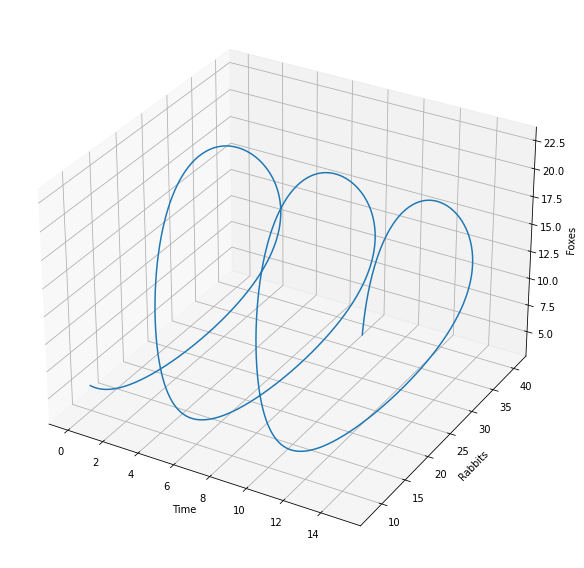

In [4]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')


ax.plot3D(tspan, X[:,0], X[:,1])
ax.set_xlabel('Time')
ax.set_ylabel('Rabbits')
ax.set_zlabel('Foxes')

plt.tight_layout()

### 2-D Projections

#### Rabbits v. Time

Text(0, 0.5, 'Rabbits')

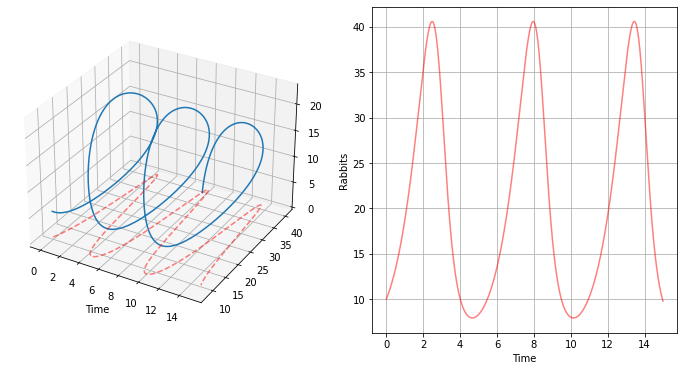

In [5]:
fig = plt.figure(figsize=(12,6))
# gridspec_kw={'height_ratios': [3, 2]}
ax1 = fig.add_subplot(1, 2, 1, projection='3d') 

ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')
ax1.plot(tspan, X[:,0], 'r--', zdir='z', zs=0, alpha=.5)


ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(tspan, X[:,0], 'r-', alpha=.5)
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Rabbits')

#### Foxes v. Time

Text(0, 0.5, 'Foxes')

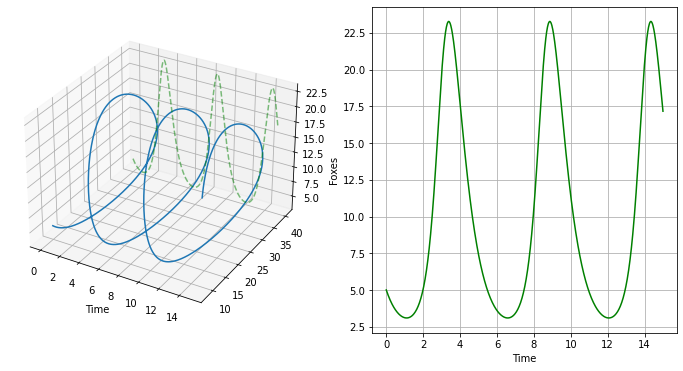

In [7]:
fig = plt.figure(figsize=(12,6))
# gridspec_kw={'height_ratios': [3, 2]}
ax1 = fig.add_subplot(1, 2, 1, projection='3d') 

ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')

ax1.plot(tspan, X[:,1], 'g--', zdir='y', zs=40, alpha=.5)

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(tspan, X[:,1], 'g-')
ax2.grid()
ax2.set_xlabel('Time')
ax2.set_ylabel('Foxes')

#### Rabbits v. Foxes

In [ ]:
fig = plt.figure(figsize=(12,6))
# gridspec_kw={'height_ratios': [3, 2]}
ax1 = fig.add_subplot(1, 2, 1, projection='3d') 

ax1.plot3D(tspan, X[:,0], X[:,1])
ax1.set_xlabel('Time')

ax1.plot(X[:,0], X[:,1], 'k--', zdir='x', zs=0, alpha=.5)

ax2 = fig.add_subplot(1, 2, 2)

ax2.plot(X[:,0], X[:,1], 'k-', alpha=.5)
ax2.grid()
ax2.set_xlabel('Rabbits')
ax2.set_ylabel('Foxes')

## Plotting a Phase Portrait

The following example utilizes an undamped pendulum with no external forcing.

In [ ]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

In [ ]:
from utils.ode_tools import phase_portrait

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)
phase_portrait(y1, y2,f)

## Plotting a Solution in a Phase Plane

Given a set of initial conditions, visualize the solution in the phase plane given some range of times.

In [ ]:
from utils.ode_tools import plot_phase_sol

tspan = np.linspace(0, 50, 200) # range of time to visualize solution

fig1, ax1 = plt.subplots(figsize=(12,8))

plot_phase_sol(y1, y2, f, tspan, v1_0=0, v2_0=1, ax=ax1)
plot_phase_sol(y1, y2, f, tspan, v1_0=0, v2_0=2, ax=ax1, add_phase_plane=False)
plot_phase_sol(y1, y2, f, tspan, v1_0=0, v2_0=0, ax=ax1, add_phase_plane=False)

## Predator Prey Model

Using the above tools, we return to the predator-prey model.

In [ ]:
# Definition of parameters
a = 1.  # natural growth rate of rabbits
b = 0.1  # natural dying rate of rabbits
c = 1.5  # natural dying rate of fox
d = 0.75  # factor describes how many rabbits create new fox



In [ ]:
# Growth rate of foxes and rabbits
def dxdt(X, t=0):
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])


In [ ]:
from scipy.integrate import odeint
tspan = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = odeint(dxdt, X0, tspan, full_output=True)

In [ ]:
# Plot Ranges
r = np.linspace(0, 60, 20)
f = np.linspace(0, 40, 20)
# Initial conditions
r0=6
f0=3

fig2, ax2 = plt.subplots(figsize=(12,8))

plot_phase_sol(r, f, dxdt, tspan, 6, 3, ax=ax2)
plot_phase_sol(r, f, dxdt, tspan, 9, 4, ax=ax2, add_phase_plane=False)
plot_phase_sol(r, f, dxdt, tspan, 12, 6, ax=ax2, add_phase_plane=False)
plot_phase_sol(r, f, dxdt, tspan, 15, 8, ax=ax2, add_phase_plane=False)

In [ ]:
## Plot together
fig, axs = plt.subplots(2, 1, figsize=(9,9), gridspec_kw={'height_ratios': [3, 2]})

# Phase Portraits
plot_phase_sol(r, f, dxdt, tspan, 6, 3, ax=axs[0])

# ax1.plot([0, 1], [0, 1])
# plot_phase_sol(r, f, dxdt, tspan, 6, 3, ax=ax2)

# Change over time
rabbits, foxes = X.T
t = tspan
f1 = plt.figure()
axs[1].plot(t, rabbits, 'r-', label='Rabbits')
axs[1].plot(t, foxes  , 'b-', label='Foxes')
axs[1].grid()
axs[1].legend(loc='best')
axs[1].set_xlabel('time')
axs[1].set_ylabel('population')
axs[1].set_title('Evolution of fox and rabbit populations')